## Ejemplos básicos de pandas

Este cuaderno es una guia a través de algunos conceptos muy básicos de Pandas. Comenzaremos con la importación de bibliotecas típicas de ciencia de datos:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Serie

La serie es como una lista o una matriz 1D, pero con índice. Todas las operaciones están alineadas con el índice.

In [2]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Uno de los usos frecuentes de las series es **series temporales**. En las series temporales, el índice tiene una estructura especial, normalmente un intervalo de fechas o fechas. Podemos crear un índice de este tipo con `pd.date_range`.

Supongamos que tenemos una serie que muestra la cantidad de producto comprado cada día, y sabemos que cada domingo también necesitamos llevarnos un artículo para nosotros. A continuación, se explica cómo modelar eso usando series:

Length of index is 366


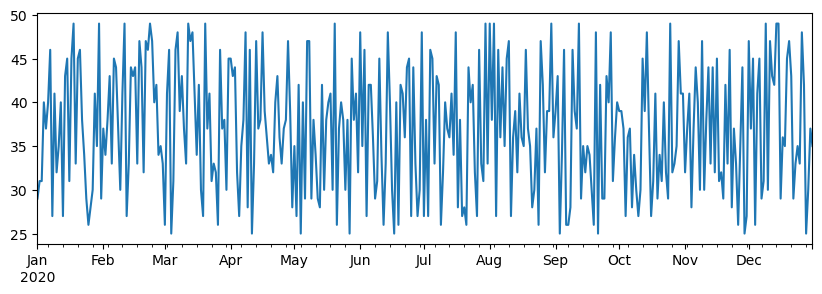

In [3]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [4]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Como puedes ver, estamos teniendo problemas aquí, porque en la serie semanal los días no mencionados se consideran faltantes (`NaN`), y al sumar `NaN` a un número nos da `NaN`. Para obtener el resultado correcto, debemos especificar `fill_value` al agregar series:

2020-01-01    29.0
2020-01-02    31.0
2020-01-03    31.0
2020-01-04    40.0
2020-01-05    47.0
              ... 
2020-12-27    52.0
2020-12-28    25.0
2020-12-29    30.0
2020-12-30    37.0
2020-12-31    35.0
Length: 366, dtype: float64


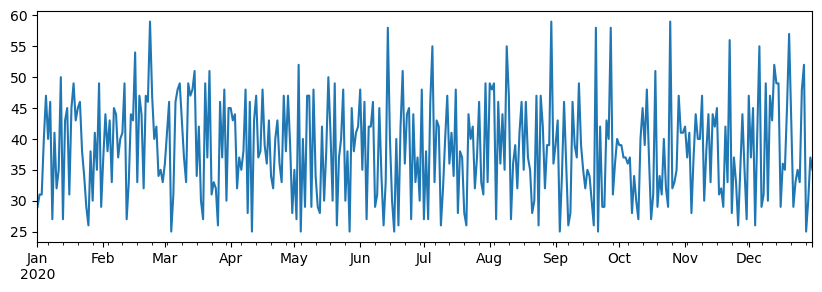

In [5]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

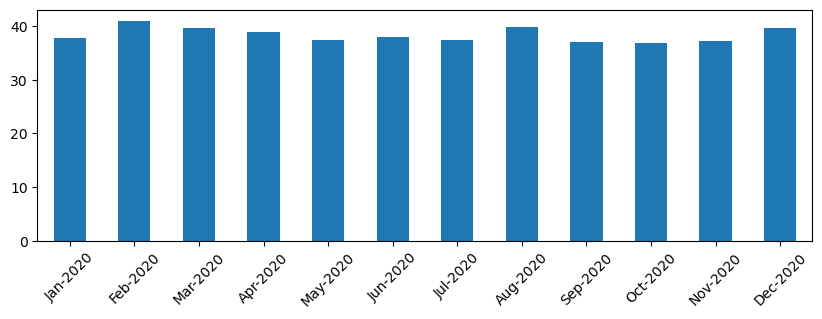

In [6]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Un dataframe es esencialmente una colección de series con el mismo índice. Podemos combinar varias series en un dataframe. Dadas las series `a` y `b` definidas anteriormente:

In [7]:
df = pd.DataFrame([a,b])
df

,0,1,2,3,4,5,6,7,8
0,1,2,3,4,5,6,7,8,9
1,I,like,to,use,Python,and,Pandas,very,much


También podemos usar Series como columnas y especificar los nombres de las columnas usando el diccionario:

In [8]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


Se puede lograr el mismo resultado transponiendo (y luego cambiando el nombre de las columnas, para que coincida con el ejemplo anterior):

In [9]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

,A,B
0,1,I
1,2,like
2,3,to
3,4,use
4,5,Python
5,6,and
6,7,Pandas
7,8,very
8,9,much


**La selección de columnas** de DataFrame se puede hacer de la siguiente manera:

In [10]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Selección de filas** en función de la expresión de filtro:

In [11]:
df[df['A']<5]

,A,B
0,1,I
1,2,like
2,3,to
3,4,use


La forma en que funciona es que la expresión `df['A']<5` devuelve una serie booleana, que indica si la expresión es `True` o `False` para cada elemento de la serie. Cuando series se usa como índice, devuelve un subconjunto de filas en DataFrame. Por lo tanto, no es posible usar expresiones booleanas arbitrarias de Python, por ejemplo, escribir `df[df['A']>5 y df['A']<7]` sería incorrecto. En su lugar, debe usar la operación especial '&' en series booleanas:

In [12]:
df[(df['A']>5) & (df['A']<7)]

,A,B
5,6,and


**Creating new computable columns**. We can easily create new computable columns for our DataFrame by using intuitive expressions. The code below calculates divergence of A from its mean value.

In [13]:
df['DivA'] = df['A']-df['A'].mean()
df

,A,B,DivA
0,1,I,-4.0
1,2,like,-3.0
2,3,to,-2.0
3,4,use,-1.0
4,5,Python,0.0
5,6,and,1.0
6,7,Pandas,2.0
7,8,very,3.0
8,9,much,4.0


What actually happens is we are computing a series, and then assigning this series to the left-hand-side, creating another column.

In [14]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [15]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

,A,B,DivA,LenB
0,1,I,-4.0,1
1,2,like,-3.0,4
2,3,to,-2.0,2
3,4,use,-1.0,3
4,5,Python,0.0,6
5,6,and,1.0,3
6,7,Pandas,2.0,6
7,8,very,3.0,4
8,9,much,4.0,4


**Selecting rows based on numbers** can be done using `iloc` construct. For example, to select first 5 rows from the DataFrame:

In [16]:
df.iloc[:5]

,A,B,DivA,LenB
0,1,I,-4.0,1
1,2,like,-3.0,4
2,3,to,-2.0,2
3,4,use,-1.0,3
4,5,Python,0.0,6


**Agrupación** se usa a menudo para obtener un resultado similar a las *tablas dinámicas* en Excel. Supongamos que queremos calcular el valor medio de la columna `A` para cada número dado de `LenB`. Luego podemos agrupar nuestro DataFrame por `LenB`, y llamar a `mean`:

In [53]:
df.groupby(by='LenB').mean()

,A,DivA
LenB,,
1,1.000000,-4.000000
2,3.000000,-2.000000
3,5.000000,0.000000
4,6.333333,1.333333
6,6.000000,1.000000


Si necesitamos calcular la media y el número de elementos en el grupo, entonces podemos usar una función `aggregate` más compleja:

In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

,Count,Mean
LenB,,
1,1,1.000000
2,1,3.000000
3,2,5.000000
4,3,6.333333
6,2,6.000000


## Impresión y trazado

El científico de datos a menudo tiene que explorar los datos, por lo que es importante poder visualizarlos. Cuando DataFrame es grande, muchas veces solo queremos asegurarnos de que estamos haciendo todo correctamente imprimiendo las primeras filas. Esto se puede hacer llamando a `df.head()`. Si lo ejecuta desde Jupyter Notebook, imprimirá el DataFrame en un formato tabular agradable.

In [18]:
df.head()

,A,B,DivA,LenB
0,1,I,-4.0,1
1,2,like,-3.0,4
2,3,to,-2.0,2
3,4,use,-1.0,3
4,5,Python,0.0,6



También hemos visto el uso de la función `plot` para visualizar algunas columnas. Si bien `plot` es muy útil para muchas tareas y admite muchos tipos de gráficos diferentes a través del parámetro `kind=`, siempre puede usar la biblioteca `matplotlib` sin procesar para trazar algo más complejo. Cubriremos la visualización de datos en detalle en lecciones separadas del curso.

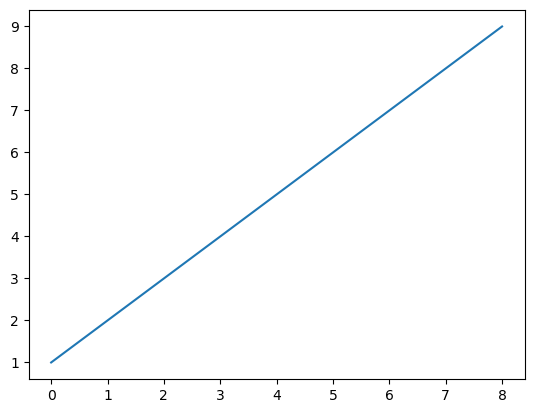

In [19]:
df['A'].plot()
plt.show()

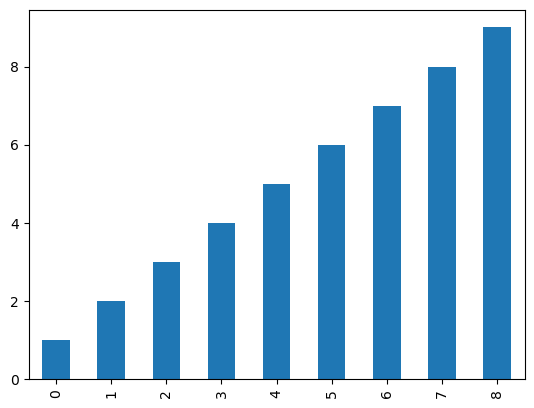

In [20]:
df['A'].plot(kind='bar')
plt.show()


Esta descripción general cubre los conceptos más importantes de Pandas, sin embargo, la biblioteca es muy rica y no hay límite para lo que puedes hacer con ella. Apliquemos ahora este conocimiento para resolver un problema específico.